In [1]:
using PastaQ

In [2]:
function PastaQ.gate(::GateName"R"; theta::Real, phi::Real)
    [
        cos(theta/2)    (-im * exp(-im * phi) * sin(theta/2))
        (-im * exp(im * phi) * sin(theta/2))     cos(theta/2)
    ]
end

function PastaQ.gate(::GateName"M"; Theta::Real)
    [
        cos(Theta)    0    0    (-im * sin(Theta))
        0    cos(Theta)    (-im * sin(Theta))    0
        0    (-im * sin(Theta))    cos(Theta)    0
        (-im * sin(Theta))    0    0    cos(Theta)
    ]
end

In [3]:
function run(N, depth)
    # Random circuit.
    gates = Vector{Tuple}[]

    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]

        for j in 1:N
            gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
            push!(one_qubit_layer, gate)
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M", (j, j+1), (Theta=2pi*rand(),))
            push!(two_qubit_layer, gate)
        end

        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)
    end

    psi = runcircuit(N, gates)
end

run (generic function with 1 method)

In [4]:
N = 4                           # Number of qubits
depth = 4                       # Depth of random circuit
nshots = 1024                   # Number of measurements
gates = run(N, depth) # Build gates

ITensors.MPS
[1] IndexSet{2} (dim=2|id=945|"Qubit,Site,n=1") (dim=2|id=940|"Link,fact")
[2] IndexSet{3} (dim=2|id=940|"Link,fact") (dim=2|id=492|"Qubit,Site,n=2") (dim=4|id=79|"Link,fact")
[3] IndexSet{3} (dim=2|id=252|"Qubit,Site,n=3") (dim=4|id=79|"Link,fact") (dim=2|id=580|"Link,fact")
[4] IndexSet{2} (dim=2|id=580|"Link,fact") (dim=2|id=974|"Qubit,Site,n=4")


In [5]:
data= getsamples(gates, nshots, local_basis = ["Z"])

1024×4 Matrix{Pair{String, Int64}}:
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
    ⋮                    
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1

In [6]:
function getValues(Pair)
    return Pair[2]
end

getValues (generic function with 1 method)

In [7]:
M = getValues.(data)

1024×4 Matrix{Int64}:
 0  1  1  0
 0  1  0  0
 0  1  1  1
 1  1  1  0
 0  1  1  1
 0  1  1  0
 1  1  0  0
 0  1  0  0
 0  1  1  1
 0  1  0  0
 1  1  1  1
 0  1  1  1
 0  1  1  1
 ⋮        
 0  1  0  0
 1  1  1  1
 0  1  0  0
 0  1  0  0
 0  1  0  0
 1  1  1  1
 0  1  1  1
 0  1  1  1
 0  1  1  1
 0  1  0  0
 0  1  1  1
 0  1  1  1

In [8]:
A = zeros(Int64, nshots)

1024-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [9]:
for i in 1:nshots
    for j in 1:N
        A[i] += 2^(j-1)*M[i,j]
    end
end

In [10]:
A

1024-element Vector{Int64}:
  6
  2
 14
  7
 14
  6
  3
  2
 14
  2
 15
 14
 14
  ⋮
  2
 15
  2
  2
  2
 15
 14
 14
 14
  2
 14
 14

In [11]:
A[1]

6

In [12]:
Pr = zeros(Int,2^N)

16-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [13]:
Pr[1]

0

In [14]:
for i in 1:nshots
    Pr[A[i] + 1] += 1
end

In [15]:
Pr

16-element Vector{Int64}:
   4
  30
 256
  62
   0
  18
 168
  29
   0
   0
   3
   0
   0
  43
 338
  73

In [16]:
idx=0

0

In [17]:
for i in 1:2^N
    idx += Pr[i]
end

In [18]:
idx

1024

In [20]:
Pr_1 = zeros(2^N)

16-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [21]:
for i in 1:2^N
    Pr_1[i]=Pr[i]/idx
end

In [22]:
Pr_1

16-element Vector{Float64}:
 0.00390625
 0.029296875
 0.25
 0.060546875
 0.0
 0.017578125
 0.1640625
 0.0283203125
 0.0
 0.0
 0.0029296875
 0.0
 0.0
 0.0419921875
 0.330078125
 0.0712890625

In [23]:
idx_1=0
for i in 1:2^N
    idx_1 += Pr_1[i]
end

In [24]:
idx_1

1.0

In [25]:
using PyPlot

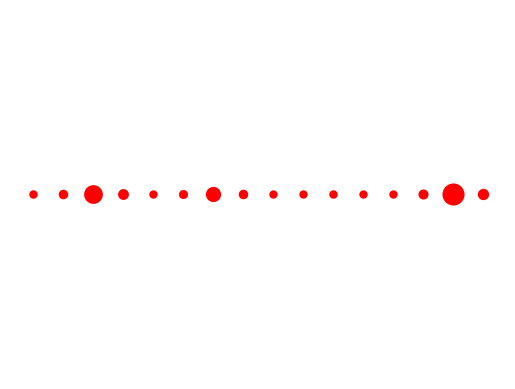

(0.25, 16.75, -0.05500000000000001, 0.05500000000000001)

In [26]:
for i in 1:2^N
    scatter(i,0,color="red",linewidth=30.0*Pr_1[i])
end
axis("off")